## Example Queries

http://minimaxir.com/2015/10/reddit-bigquery/

    SELECT
      DAYOFWEEK(created_utc) as sub_dayofweek,
      HOUR(created_utc) as sub_hour,
      SUM(IF(score >= 1000, 1, 0)) as num_with_min_score,
    FROM [fh-bigquery:reddit_posts.full_corpus_201509]
    WHERE LOWER(subreddit) IN (LOWER('dataisbeautiful'))
    GROUP BY sub_dayofweek, sub_hour
    ORDER BY sub_dayofweek, sub_hour
    
https://www.reddit.com/r/bigquery/comments/3neghj/qotd_best_time_to_post_for_success_on_each/cvnd1lq

    SELECT subreddit, dayofweek, hourofday, num_with_min_score, total
    FROM (
      SELECT
        DAYOFWEEK(created_utc) as dayofweek,
        HOUR(created_utc) as hourofday,
        SUM(score >= 1000) as num_with_min_score,
        SUM(num_with_min_score) OVER(PARTITION BY subreddit) total,
        subreddit,
      FROM [fh-bigquery:reddit_posts.full_corpus_201509]
      GROUP BY subreddit, dayofweek, hourofday
      ORDER BY subreddit, dayofweek, hourofday
    )
    WHERE total>100
    ORDER BY total DESC, dayofweek, hourofday

In [182]:
%matplotlib inline
%load_ext signature

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import helpers

# Set style and meta info.
mpl.style.use('ramiro')

weekdays_short = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

mpl.rcParams['axes.grid'] = False

The signature extension is already loaded. To reload it, use:
  %reload_ext signature


## DataIsBeautiful post times

In [183]:
df_dib = pd.read_csv('data/reddit/dataisbeautiful-top-post-times.csv')
df_dib.head()

,sub_dayofweek,sub_hour,num_with_min_score
0,1,0,1
1,1,1,3
2,1,2,1
3,1,3,4
4,1,4,1


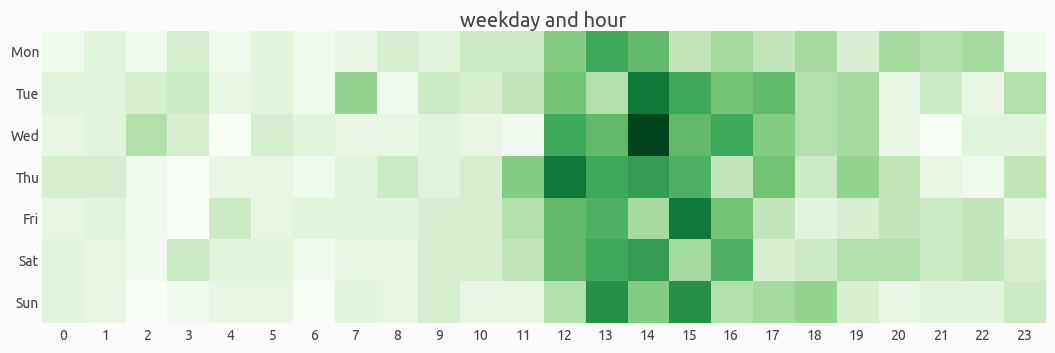

In [184]:
grouped = df_dib.groupby(['sub_dayofweek', 'sub_hour']).sum()
image = grouped.unstack()

fig, ax = plt.subplots(figsize=(16, 9))
ax.imshow(image, cmap=plt.cm.Greens, interpolation='nearest')
ax.set_title('weekday and hour')

for pos in ['top', 'right', 'bottom', 'left']:
    ax.spines[pos].set_visible(False)

plt.xticks(range(24))
plt.yticks(range(7), weekdays_short)
plt.show()

## Top subreddits post times

In [185]:
df = pd.read_csv('data/reddit/reddit-top-posts-by-subreddit-weekday-hour.csv')
df.head()

,subreddit,dayofweek,hourofday,num_with_min_score,total
0,funny,1,0,909,139737
1,funny,1,1,898,139737
2,funny,1,2,841,139737
3,funny,1,3,736,139737
4,funny,1,4,568,139737


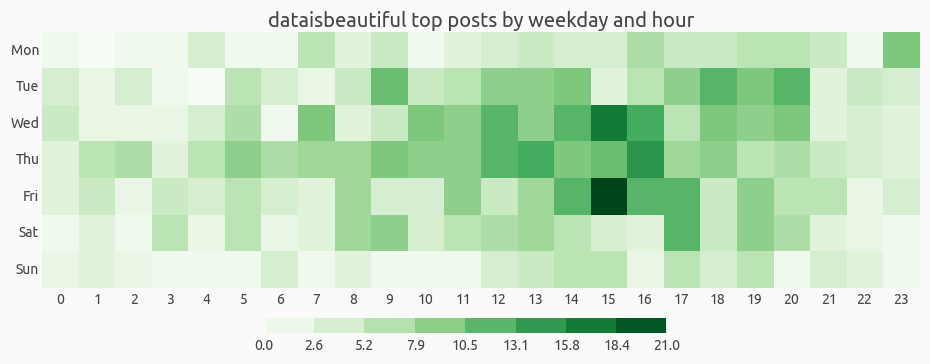

In [186]:
grouped = df[df['subreddit'] == 'programming'].groupby(['dayofweek', 'hourofday'])['num_with_min_score'].sum()
image = grouped.unstack()

fig, ax = plt.subplots(figsize=(14, 5))
cmap = plt.cm.Greens
ax.imshow(image, cmap=cmap, interpolation='nearest')
ax.set_title('dataisbeautiful top posts by weekday and hour')

for pos in ['top', 'right', 'bottom', 'left']:
    ax.spines[pos].set_visible(False)

plt.xticks(range(24))
plt.yticks(range(7), weekdays_short)

# Draw color legend.
values = grouped.values
bins = np.linspace(values.min(), values.max(), 9)
ax_legend = fig.add_axes([0.3, 0, 0.4, .05])
mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=[round(x, 1) for x in bins], boundaries=bins, orientation='horizontal')

plt.show()

In [187]:
image

hourofday,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,4,1,1,6,3,5,...,4,4,7,5,5,6,6,5,1,10
2,4,2,4,1,0,6,4,2,5,11,...,10,3,6,9,12,10,12,3,5,4
3,5,2,2,2,4,7,1,10,3,5,...,12,17,13,6,10,9,10,3,4,3
4,3,6,7,3,6,9,7,8,8,10,...,10,11,15,8,9,6,7,5,4,3
5,3,5,2,5,4,6,4,3,8,4,...,12,21,12,12,5,9,6,6,2,4
6,1,3,1,6,2,6,2,3,8,9,...,6,4,3,12,5,9,7,3,2,1
7,2,3,2,1,1,1,4,1,3,1,...,6,6,2,6,4,6,1,4,3,1


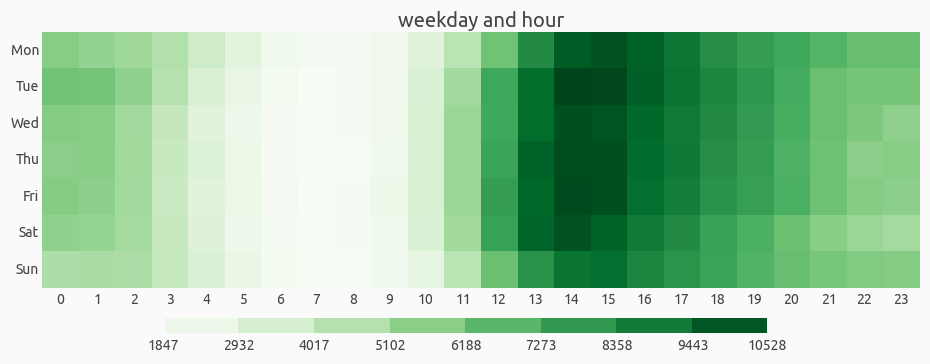

In [188]:
grouped = df.groupby(['dayofweek', 'hourofday'])['num_with_min_score'].sum()
image = grouped.unstack()

fig, ax = plt.subplots(figsize=(14, 5))
cmap = plt.cm.Greens
ax.imshow(image, cmap=cmap, interpolation='nearest')
ax.set_title('weekday and hour')

for pos in ['top', 'right', 'bottom', 'left']:
    ax.spines[pos].set_visible(False)

plt.xticks(range(24))
plt.yticks(range(7), weekdays_short)

# Draw color legend.
values = grouped.values
bins = np.linspace(values.min(), values.max(), 9)
ax_legend = fig.add_axes([0.2, 0, 0.6, .05])
mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')

plt.show()